## Import emulator and instantiate it

In [1]:
import emulator

In [2]:
net = emulator.ChemistryEmulator(gpu=0, verbose=True)

Loading model weights
N. total parameters MLP :            2627073
N. total parameters CONDITION-PARS : 1053696
N. total parameters CONDITION-MOL :  1149440
Setting weights of the model...


In [61]:
f = open('list_molecules.txt')
mols = f.readlines()
f.close()
for i in range(len(mols)):
    mols[i] = mols[i][0:-1]

## Do some calculations
Now we define the number of models we want to compute. We also define the batch size. All models in the batch size will be computed in parallel

In [3]:
n_models = 32 * 10
batch_size = 32

In [4]:
nh = 10.0**np.random.uniform(np.log10(1e4), np.log10(1e7), size=n_models)
T = np.random.uniform(10.0, 80.0, size=n_models)
crir = 10.0**np.random.uniform(np.log10(1e-17), np.log10(1e-15), size=n_models)
sulfur = 10.0**np.random.uniform(np.log10(7.5e-8), np.log10(1.5e-5), size=n_models)
uv_flux = 10.0**np.random.uniform(np.log10(0.1), np.log10(1e4), size=n_models)

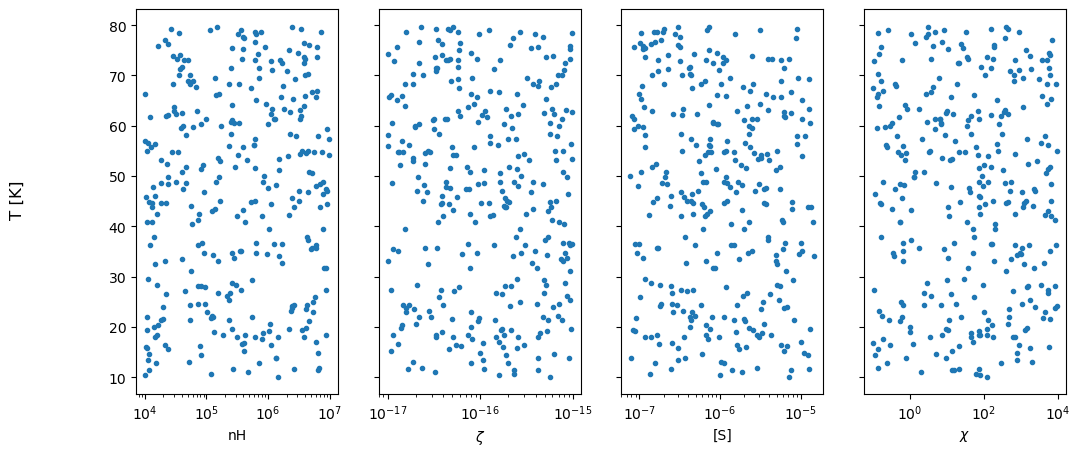

In [5]:
fig, ax = pl.subplots(nrows=1, ncols=4, sharey=True, figsize=(12,5))
ax[0].semilogx(nh, T, '.')
ax[0].set_xlabel('nH')
ax[1].semilogx(crir, T, '.')
ax[1].set_xlabel(r'$\zeta$')
ax[2].semilogx(sulfur, T, '.')
ax[2].set_xlabel(f'[S]')
ax[3].semilogx(uv_flux, T, '.')
ax[3].set_xlabel(r'$\chi$')
_ = fig.supylabel('T [K]')

In [6]:
t = np.logspace(0, 7, 120)

In [7]:
abundance = net.evaluate(t, T, nh, crir, sulfur, uv_flux, batch_size=batch_size)

Working on parameters...


100%|████████████████████████████████████████████████████████████████████████████████████████| 10/10 [03:22<00:00, 20.28s/it]


In [59]:
abundance.shape
mols

[]

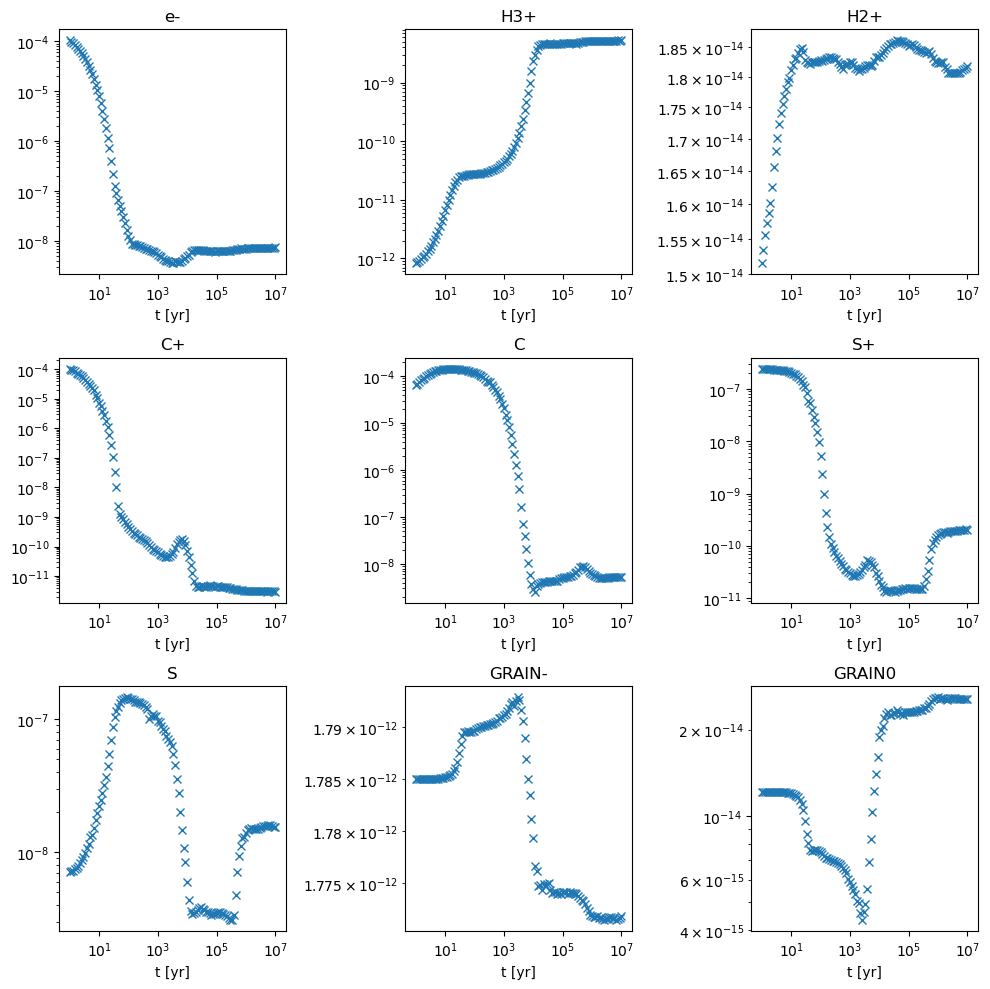

In [62]:
fig, ax = pl.subplots(nrows=3, ncols=3, figsize=(10, 10), tight_layout=True)
loop = 0
for i in range(3):
    for j in range(3):
        ax.flat[loop].loglog(t, abundance[0, loop, :], 'x')
        ax.flat[loop].set_title(mols[loop])
        ax.flat[loop].set_xlabel('t [yr]')
        loop += 1

Text(0.5, 1.0, 'e-')

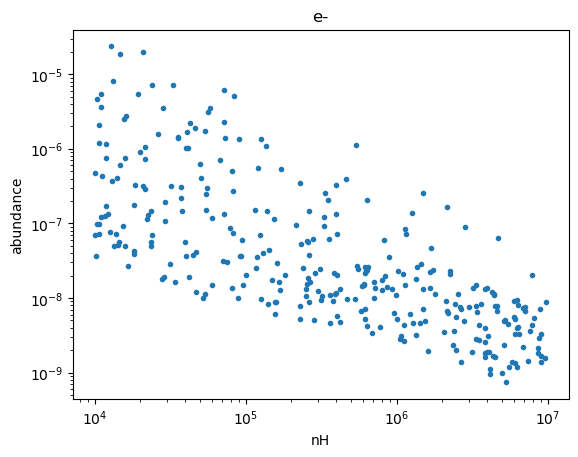

In [69]:
fig, ax = pl.subplots()
ax.loglog(nh, abundance[:,0,-1], '.')
ax.set_xlabel('nH')
ax.set_ylabel('abundance')
ax.set_title(mols[0])

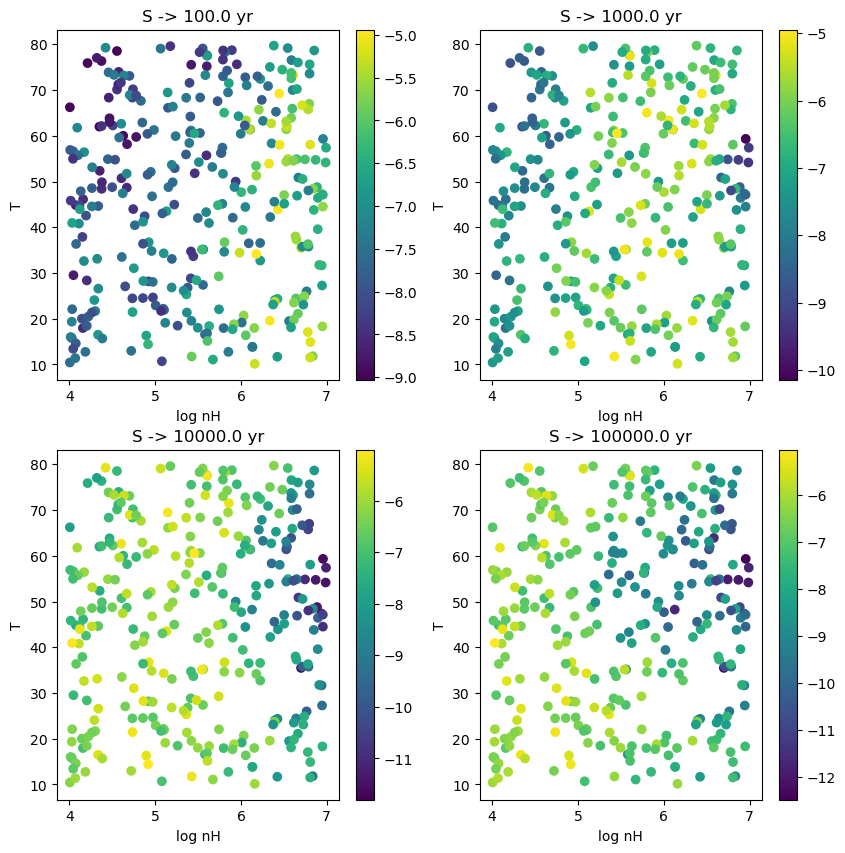

In [67]:
fig, ax = pl.subplots(nrows=2, ncols=2, figsize=(10,10))
times = [17*2, 17*3, 17*4, 17*5]
for loop in range(4):
    im = ax.flat[loop].scatter(np.log10(nh), T, c=np.log10(abundance[:,6,times[loop]]))
    fig.colorbar(im, ax=ax.flat[loop])
    ax.flat[loop].set_xlabel('log nH')
    ax.flat[loop].set_ylabel('T')
    ax.flat[loop].set_title(f'{mols[6]} -> {t[times[loop]]} yr')